<a href="https://colab.research.google.com/github/Anshul-ARK/ml_lab/blob/main/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Rolls (5 experiments × 3 dice):
[[5 4 1]
 [5 4 4]
 [6 2 3]
 [1 5 3]
 [2 2 1]]
Sum of each experiment: [10, 13, 11, 9, 5]
Mean: 9.6
Variance: 7.040000000000001


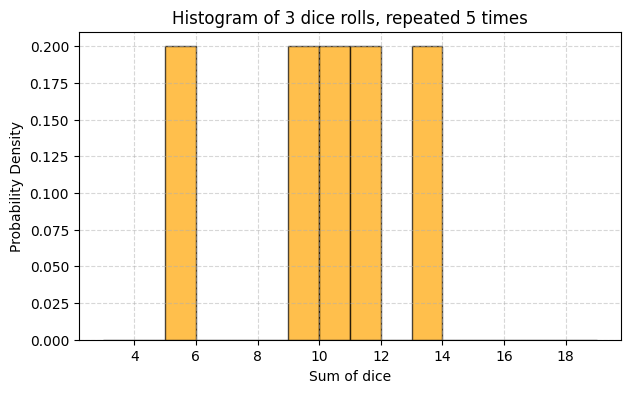

In [ ]:
num_exp = 5   # 5 experiments
num_dice = 3  # 3 dice
results = []
rolls = np.random.randint(1, 7, size=(num_exp, num_dice))
print("Rolls (5 experiments × 3 dice):")
print(rolls)


sums = np.sum(rolls, axis=1)   # row-wise sum
sums = sums.tolist()           # convert to normal Python list
print("Sum of each experiment:", sums)

mean = np.mean(sums)
var = np.var(sums)
results.append((num_exp, num_dice, mean, var))
print("Mean:", mean)
print("Variance:", var)
 # Plot histogram
plt.figure(figsize=(7, 4))
plt.hist(sums, bins=range(num_dice, 6*num_dice+2), density=True, alpha=0.7, color='orange', edgecolor='black')
plt.title(f"Histogram of {num_dice} dice rolls, repeated {num_exp} times")
plt.xlabel("Sum of dice")
plt.ylabel("Probability Density")
plt.grid(True, linestyle="--", alpha=0.5)



In [ ]:
num_dice = range(1, 51)
num_experiments_list = [100, 500, 1000, 5000, 10000,50000,100000]
os.makedirs("die_histograms_case", exist_ok=True)

results = []

for i in num_dice:
    for N in num_experiments_list:
        # N experiments, each rolling i dice
        rolls = np.random.randint(1, 7, size=(N, i))
        sums = np.sum(rolls, axis=1)   # row-wise sum (per experiment)

        mean_val = np.mean(sums)
        var_val = np.var(sums)
        results.append((i, N, mean_val, var_val))

# Convert results list into DataFrame
df = pd.DataFrame(results, columns=["Num_Dice", "Num_Experiments", "Mean", "Variance"])

# Save to CSV
df.to_csv("results.csv", index=False)

print("CSV file saved at: die_histograms_case/results.csv")



CSV file saved at: die_histograms_case/results.csv


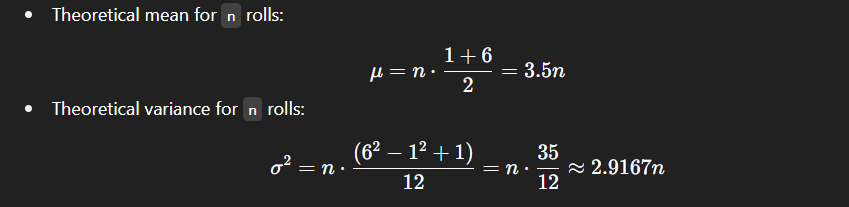

[ 7 12 11 ... 12 14  8]


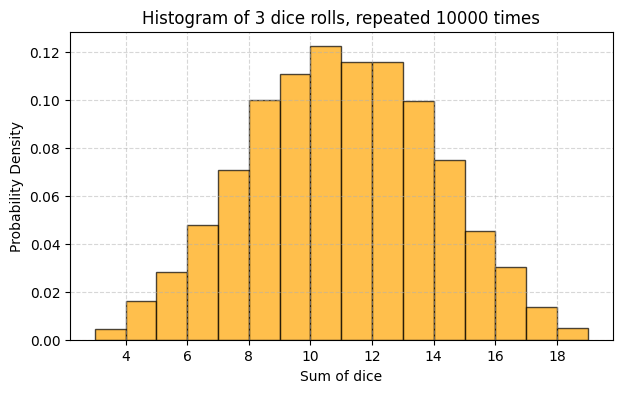

In [ ]:
filename = f"die_histograms_case/dice_{num_dice}_N_{N}.png"
# plt.savefig(filename)
# plt.close()

df = pd.DataFrame(results, columns=["Num_dices","Num_Experiments", "Mean", "Variance"])
#print(df)

rolls = np.random.randint(1,7, size = (10000,3))
sums = np.sum(rolls, axis=1)
print(sums)
plt.figure(figsize=(7, 4))
plt.hist(sums, bins=range(3, 6*3+2),density=True, alpha=0.7, color='orange', edgecolor='black')
plt.title(f"Histogram of 3 dice rolls, repeated 10000 times")
plt.xlabel("Sum of dice")
plt.ylabel("Probability Density")
plt.grid(True, linestyle="--", alpha=0.5)

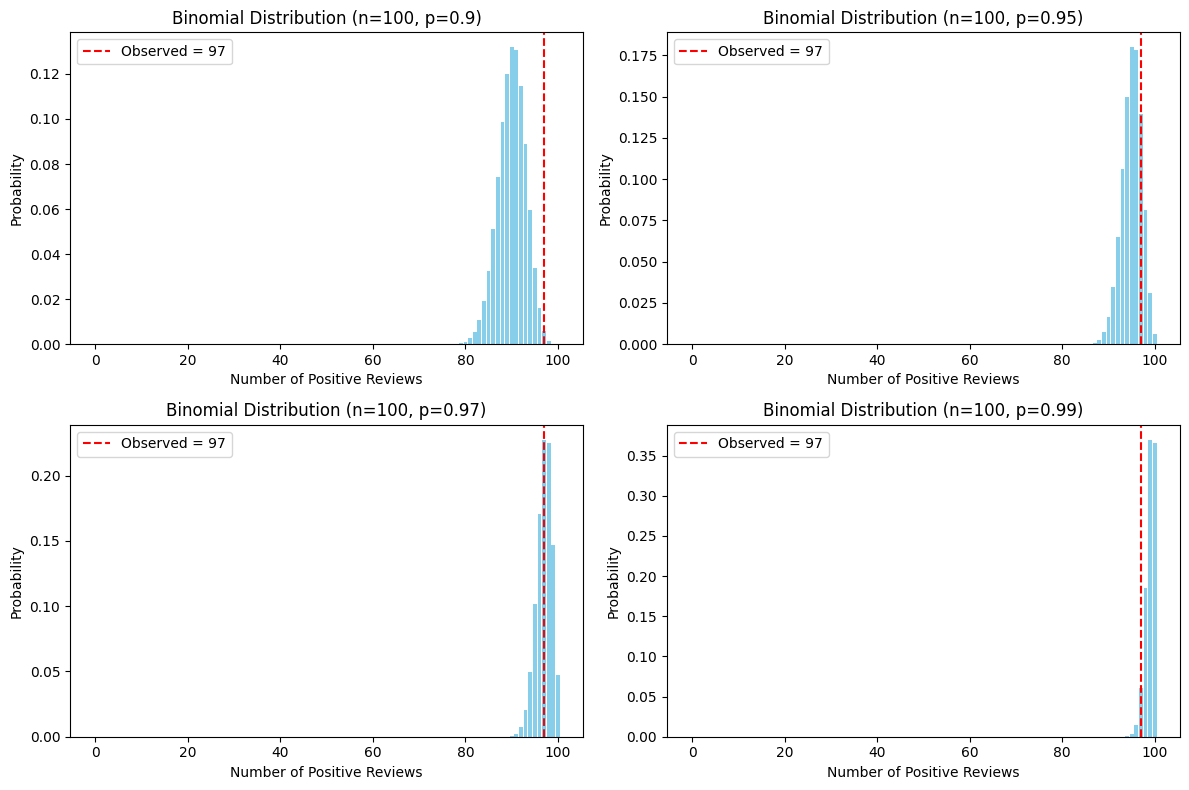

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Observed data
n = 100      # total reviews
k_obs = 97   # observed positive reviews

# Different success probabilities to test
p_values = [0.9, 0.95, 0.97, 0.99]

plt.figure(figsize=(12, 8))

for i, p in enumerate(p_values, 1):
    # Generate binomial PMF for n trials
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)

    plt.subplot(2, 2, i)
    plt.bar(x, pmf, color='skyblue')
    plt.axvline(k_obs, color='red', linestyle='--', label=f'Observed = {k_obs}')
    plt.title(f'Binomial Distribution (n={n}, p={p})')
    plt.xlabel('Number of Positive Reviews')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sem5/ml_assignments/ass_1/Housing.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def compute_entropy(series, bins=10):
    """
    Compute entropy for a pandas Series.
    - For categorical: uses unique values
    - For continuous: bins into 'bins' equal-width intervals
    """
    if series.dtype == 'object' or str(series.dtype) == 'category':
        # Categorical
        counts = series.value_counts()
    else:
        # Continuous → binning
        counts, _ = np.histogram(series, bins=bins)

    probs = counts / counts.sum()
    probs = probs[probs > 0]  # ignore zero probabilities
    entropy = -np.sum(probs * np.log2(probs))
    return entropy


In [ ]:
# Example with one dataset
df_example = df.copy()  # your dataframe

entropy_dict = {}
for col in df_example.columns:
    entropy_dict[col] = compute_entropy(df_example[col], bins=10)

# Convert to dataframe for nicer display
entropy_df = pd.DataFrame(list(entropy_dict.items()), columns=['Column', 'Entropy'])
print(entropy_df)


              Column   Entropy
0              price  2.558412
1               area  2.416578
2           bedrooms  1.578376
3          bathrooms  0.944786
4            stories  1.601335
5           mainroad  0.587593
6          guestroom  0.675642
7           basement  0.934477
8    hotwaterheating  0.268594
9    airconditioning  0.899528
10           parking  1.547615
11          prefarea  0.786392
12  furnishingstatus  1.557256


Interpretation:

Entropy = 0 → all values are same → no uncertainty

Higher entropy → more variability

In [ ]:
def plot_entropy_histogram(df, bins=10):
    # Compute entropy for each column
    entropy_dict = {col: compute_entropy(df[col], bins=bins) for col in df.columns}

    # Plot histogram
    plt.figure(figsize=(8,5))
    plt.bar(entropy_dict.keys(), entropy_dict.values(), color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Entropy')
    plt.title(f'Column-wise Entropy')
    plt.tight_layout()
    plt.show()

    # Optionally, return the entropy values
    return entropy_dict


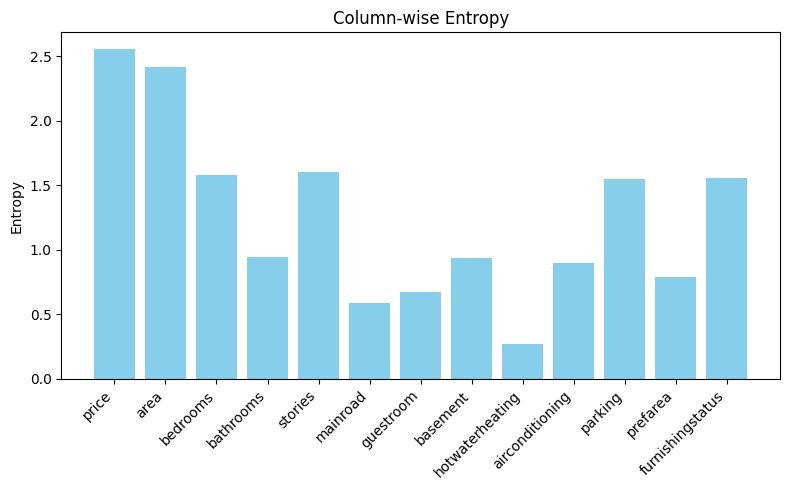

{'price': np.float64(2.5584120118580436),
 'area': np.float64(2.4165782102155977),
 'bedrooms': np.float64(1.5783764246200245),
 'bathrooms': np.float64(0.9447864125469403),
 'stories': np.float64(1.6013354416692476),
 'mainroad': np.float64(0.5875926904926543),
 'guestroom': np.float64(0.6756416842992281),
 'basement': np.float64(0.9344770602437216),
 'hotwaterheating': np.float64(0.26859376366582177),
 'airconditioning': np.float64(0.8995281870698584),
 'parking': np.float64(1.5476148578504698),
 'prefarea': np.float64(0.7863917038359864),
 'furnishingstatus': np.float64(1.5572561266379552)}

In [ ]:
plot_entropy_histogram(df)